<h1>My filterbank files</h1>

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.reshape(np.fromfile('326/2019-01-30-10:09:17_0000000000000000.000000.dat', dtype=np.float32), (-1, 1024)).T

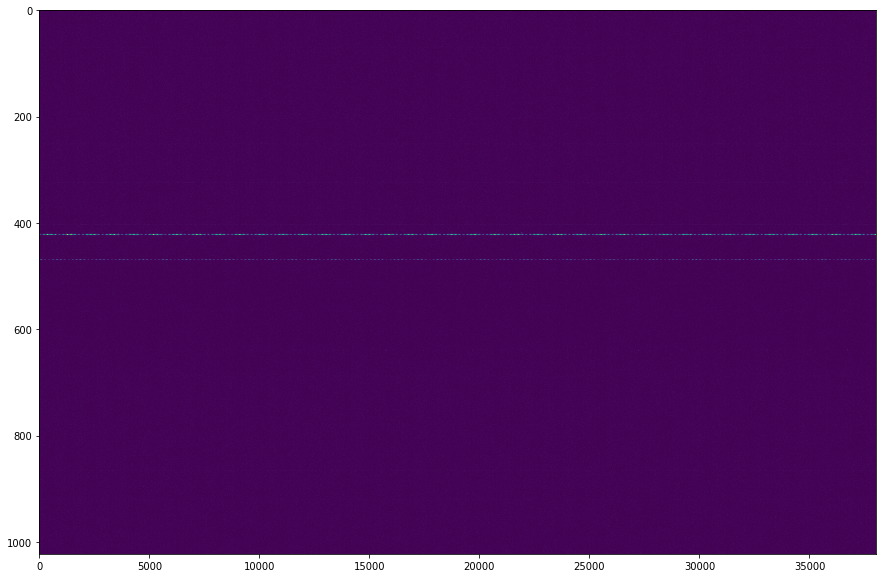

In [3]:
fig = plt.figure(figsize=(15,10))

plt.imshow(data[1:, 1024:], aspect='auto')

In [4]:
bandpass = np.sum(data[1:, :], axis=1)

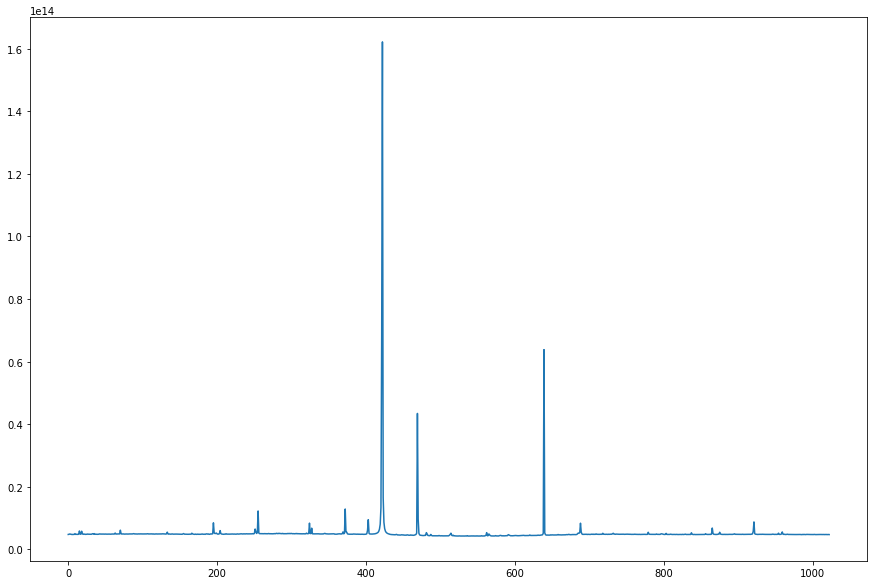

In [5]:
fig = plt.figure(figsize=(15,10))

plt.plot(bandpass)

In [6]:
data310 = np.reshape(np.fromfile('310/2019-01-30-10:09:17_0000000000000000.000000.dat', dtype=np.float32), (-1, 1024)).T
data326 = np.reshape(np.fromfile('326/2019-01-30-10:09:17_0000000000000000.000000.dat', dtype=np.float32), (-1, 1024)).T
data342 = np.reshape(np.fromfile('342/2019-01-30-10:09:17_0000000000000000.000000.dat', dtype=np.float32), (-1, 1024)).T
data358 = np.reshape(np.fromfile('358/2019-01-30-10:09:17_0000000000000000.000000.dat', dtype=np.float32), (-1, 1024)).T

Text(0.5,1,'358')

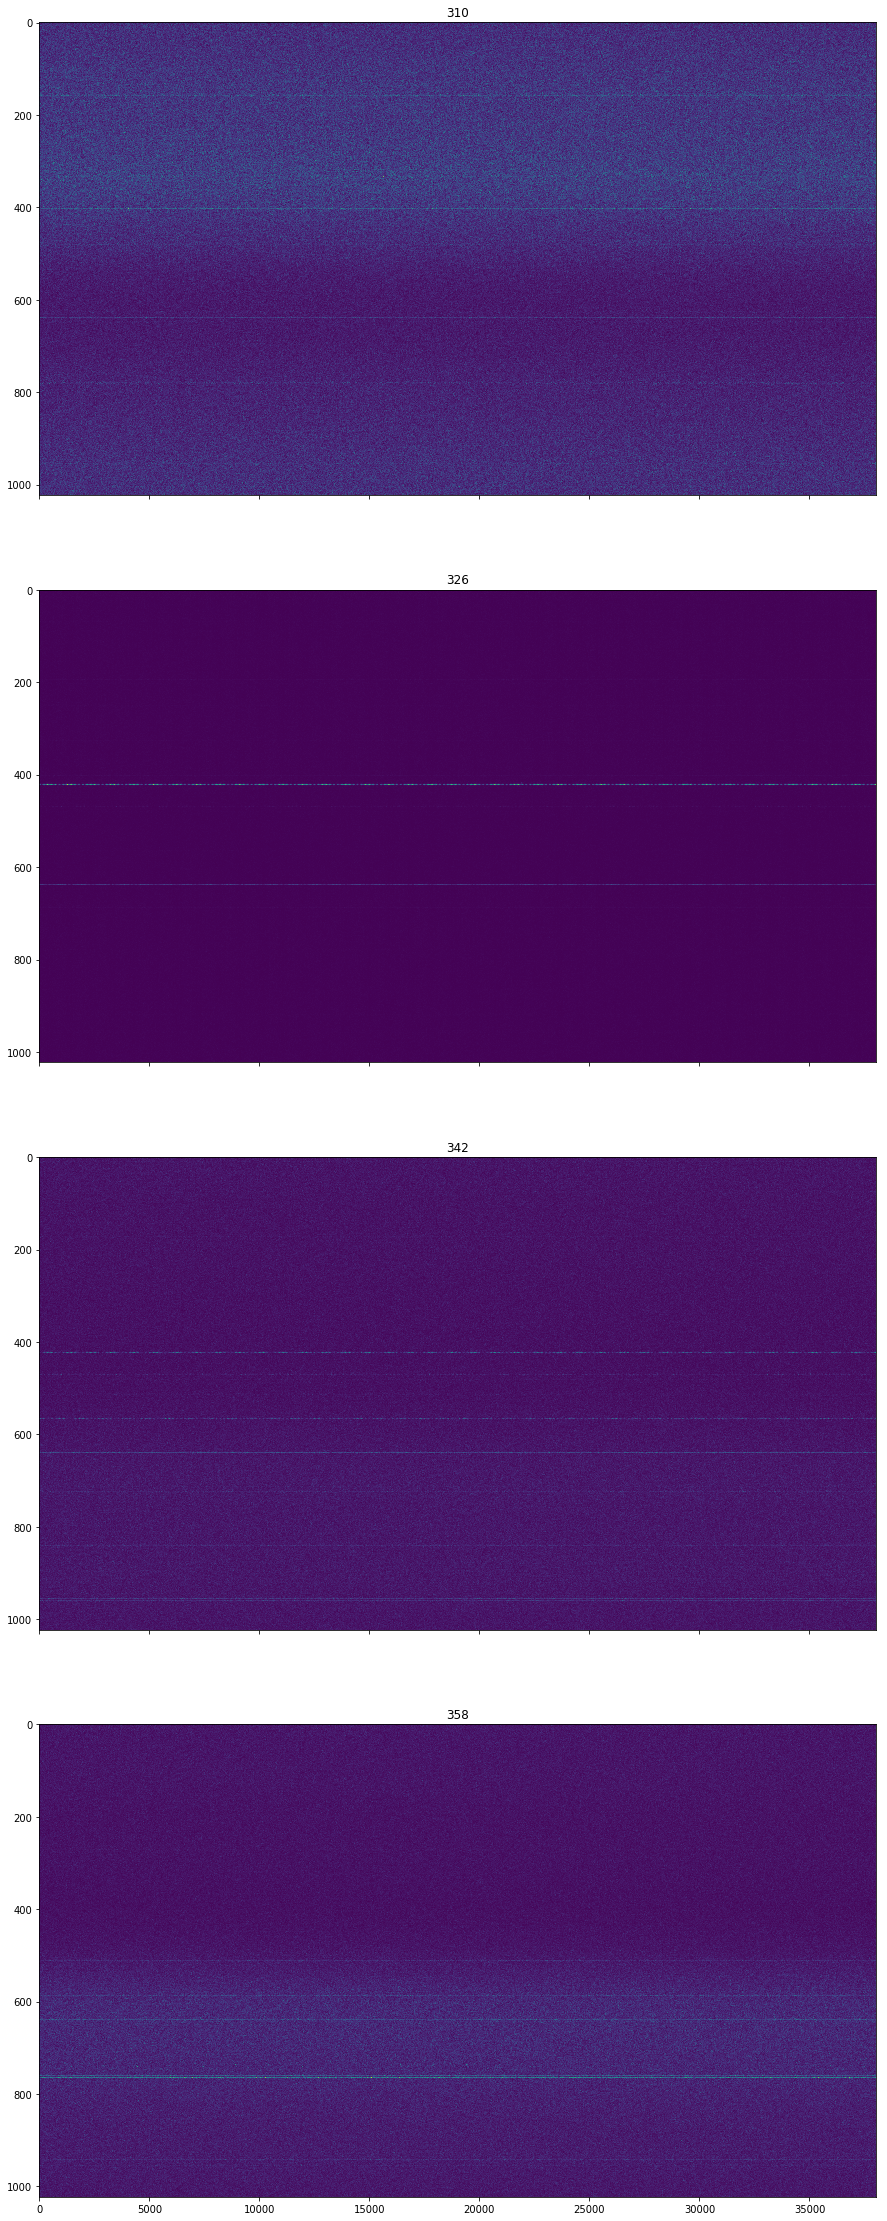

In [7]:
fig, axis = plt.subplots(4, 1, sharex=True, figsize=(15,40))

axis[0].imshow(data310[1:, 1024:], aspect='auto')
axis[0].set_title('310')
axis[1].imshow(data326[1:, 1024:], aspect='auto')
axis[1].set_title('326')
axis[2].imshow(data342[1:, 1024:], aspect='auto')
axis[2].set_title('342')
axis[3].imshow(data358[1:, 1024:], aspect='auto')
axis[3].set_title('358')

In [8]:
bandpass310 = np.sum(data310[0:, :], axis=1)
bandpass326 = np.sum(data326[0:, :], axis=1)
bandpass342 = np.sum(data342[0:, :], axis=1)
bandpass358 = np.sum(data358[0:, :], axis=1)

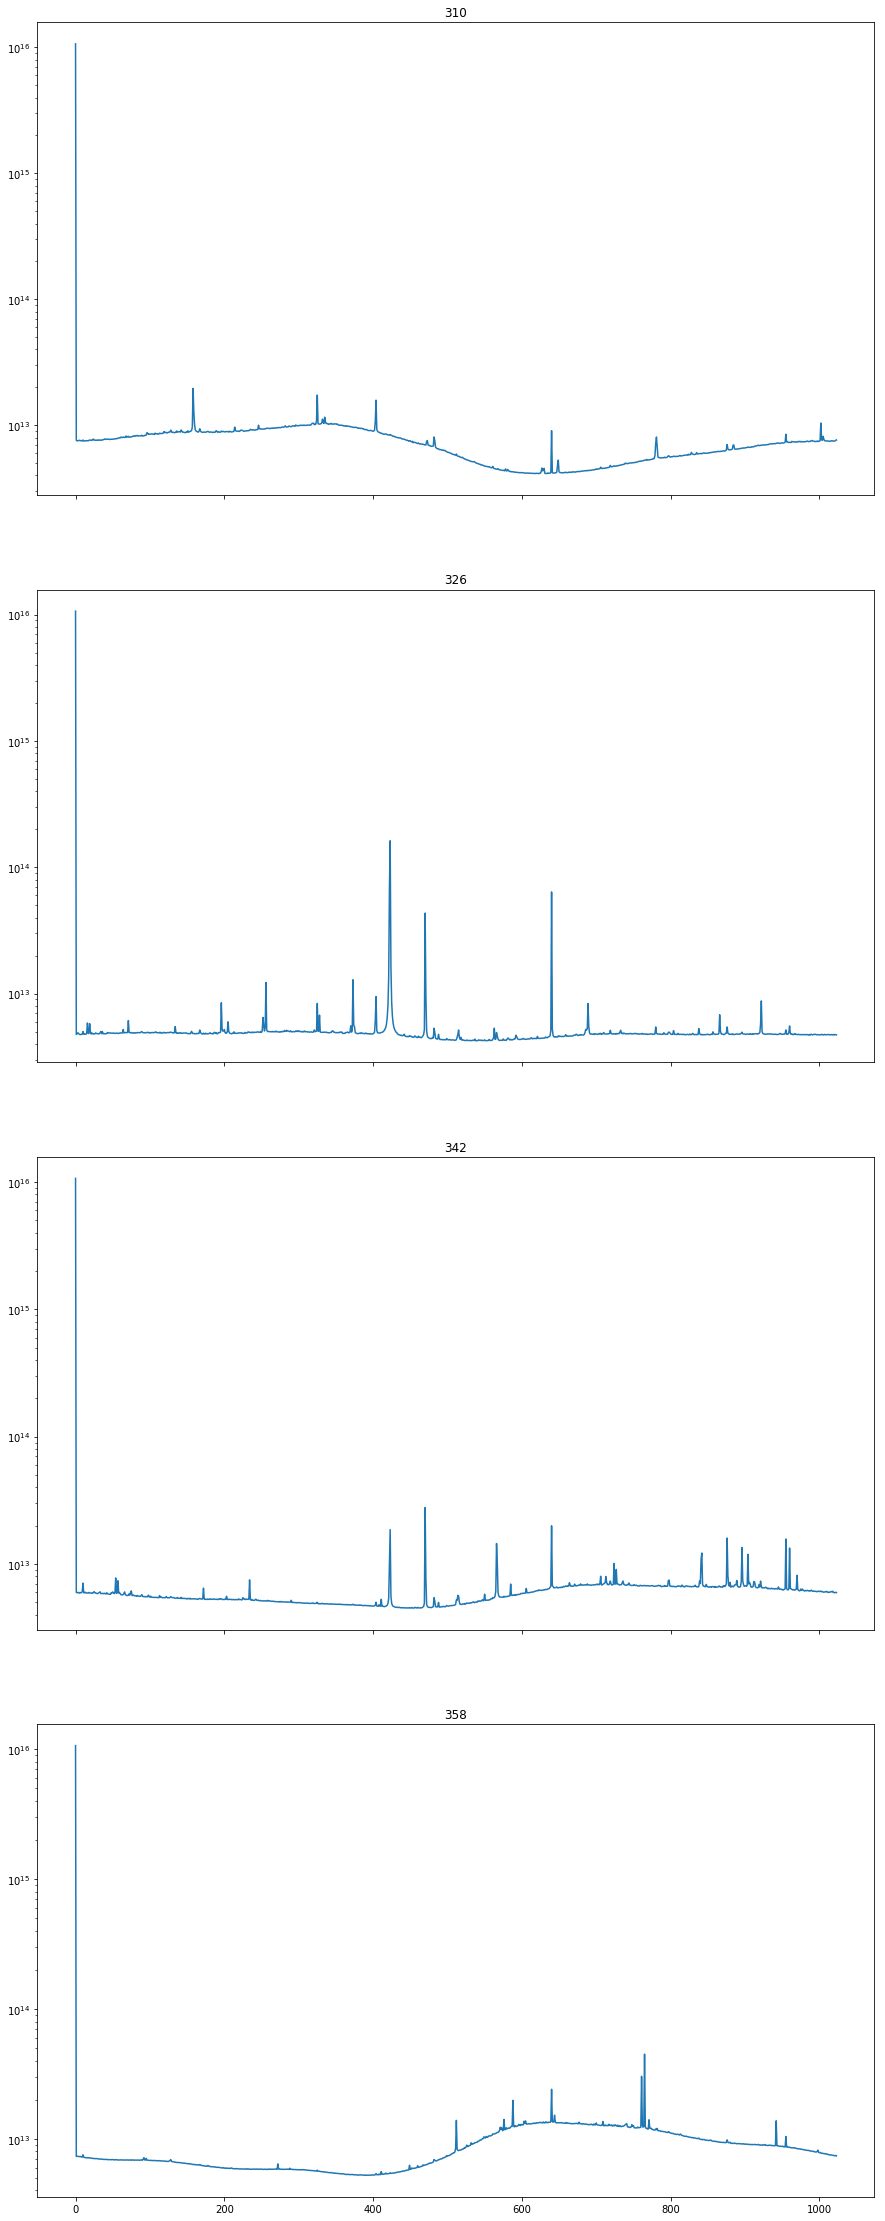

In [9]:
fig, axis = plt.subplots(4, 1, sharex=True, figsize=(15,40))

axis[0].plot(bandpass310)
axis[0].set_title('310')
axis[0].set_yscale('log')
axis[1].plot(bandpass326)
axis[1].set_title('326')
axis[1].set_yscale('log')
axis[2].plot(bandpass342)
axis[2].set_title('342')
axis[2].set_yscale('log')
axis[3].plot(bandpass358)
axis[3].set_title('358')
axis[3].set_yscale('log')

In [10]:
fullbandpass = np.concatenate((bandpass310, bandpass326, bandpass342, bandpass358))
fullbandpass.shape

(4096,)

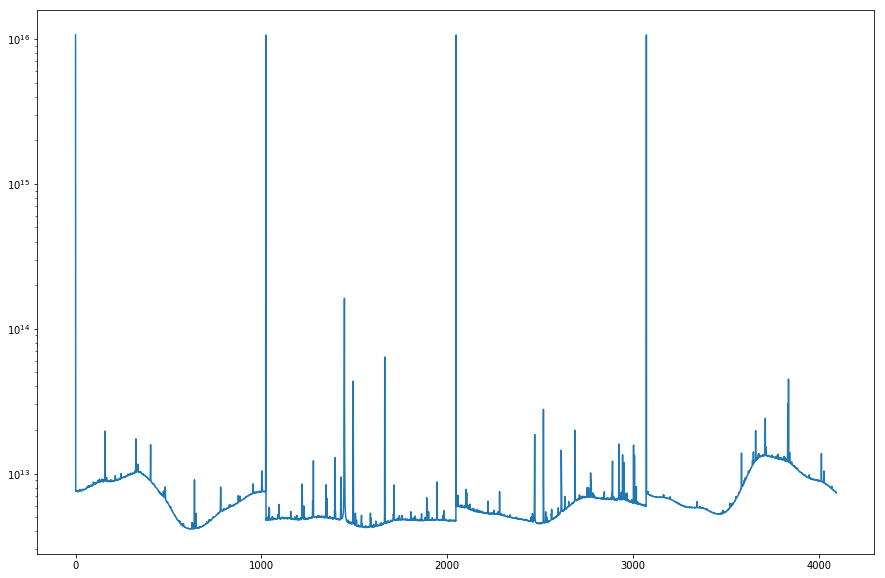

In [11]:
fig = plt.figure(figsize=(15,10))

ax =fig.gca()

ax.plot(fullbandpass)
ax.set_yscale('log')

In [12]:
diff310326 = bandpass310[1022] - bandpass326[0]
diff326342 = bandpass326[1022] - bandpass342[0]
diff342358 = bandpass342[1022] - bandpass358[0]

norm310 = np.copy(bandpass310)
norm326 = np.copy(bandpass326) + diff310326
norm342 = np.copy(bandpass342) + diff326342 + diff310326
norm358 = np.copy(bandpass358) + diff342358 + diff326342 + diff310326

fullnorm = np.concatenate((norm310, norm326, norm342, norm358))
fullnorm.shape

(4096,)

Text(0.5,1,'Non-swapped halves')

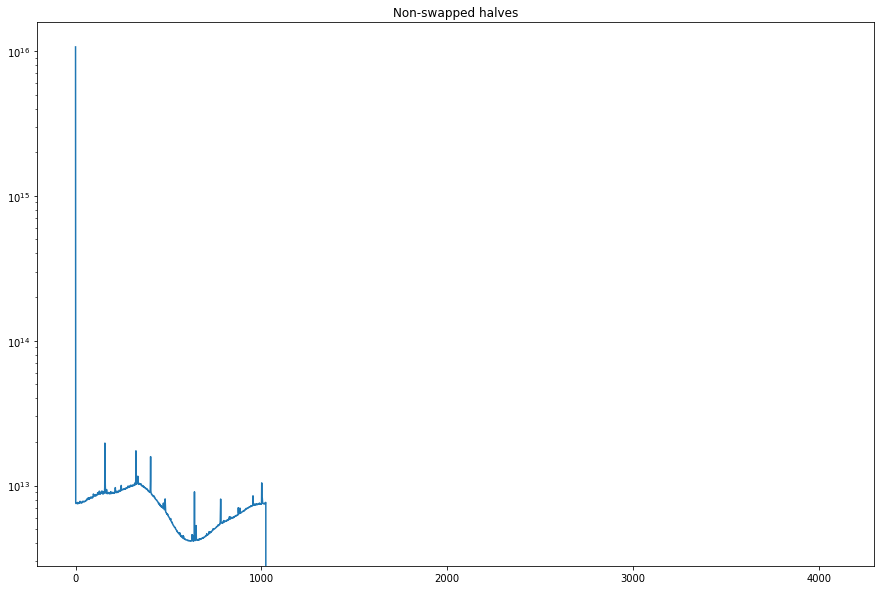

In [13]:
fig = plt.figure(figsize=(15,10))

ax =fig.gca()

ax.plot(fullnorm)
#ax.plot(fullbandpass, 'r')
ax.set_yscale('log')
ax.set_title('Non-swapped halves')

In [14]:
time310 = np.sum(data310[1:, :], axis=0)
time326 = np.sum(data326[1:, :], axis=0)
time342 = np.sum(data342[1:, :], axis=0)
time358 = np.sum(data358[1:, :], axis=0)

Text(0.5,1,'358')

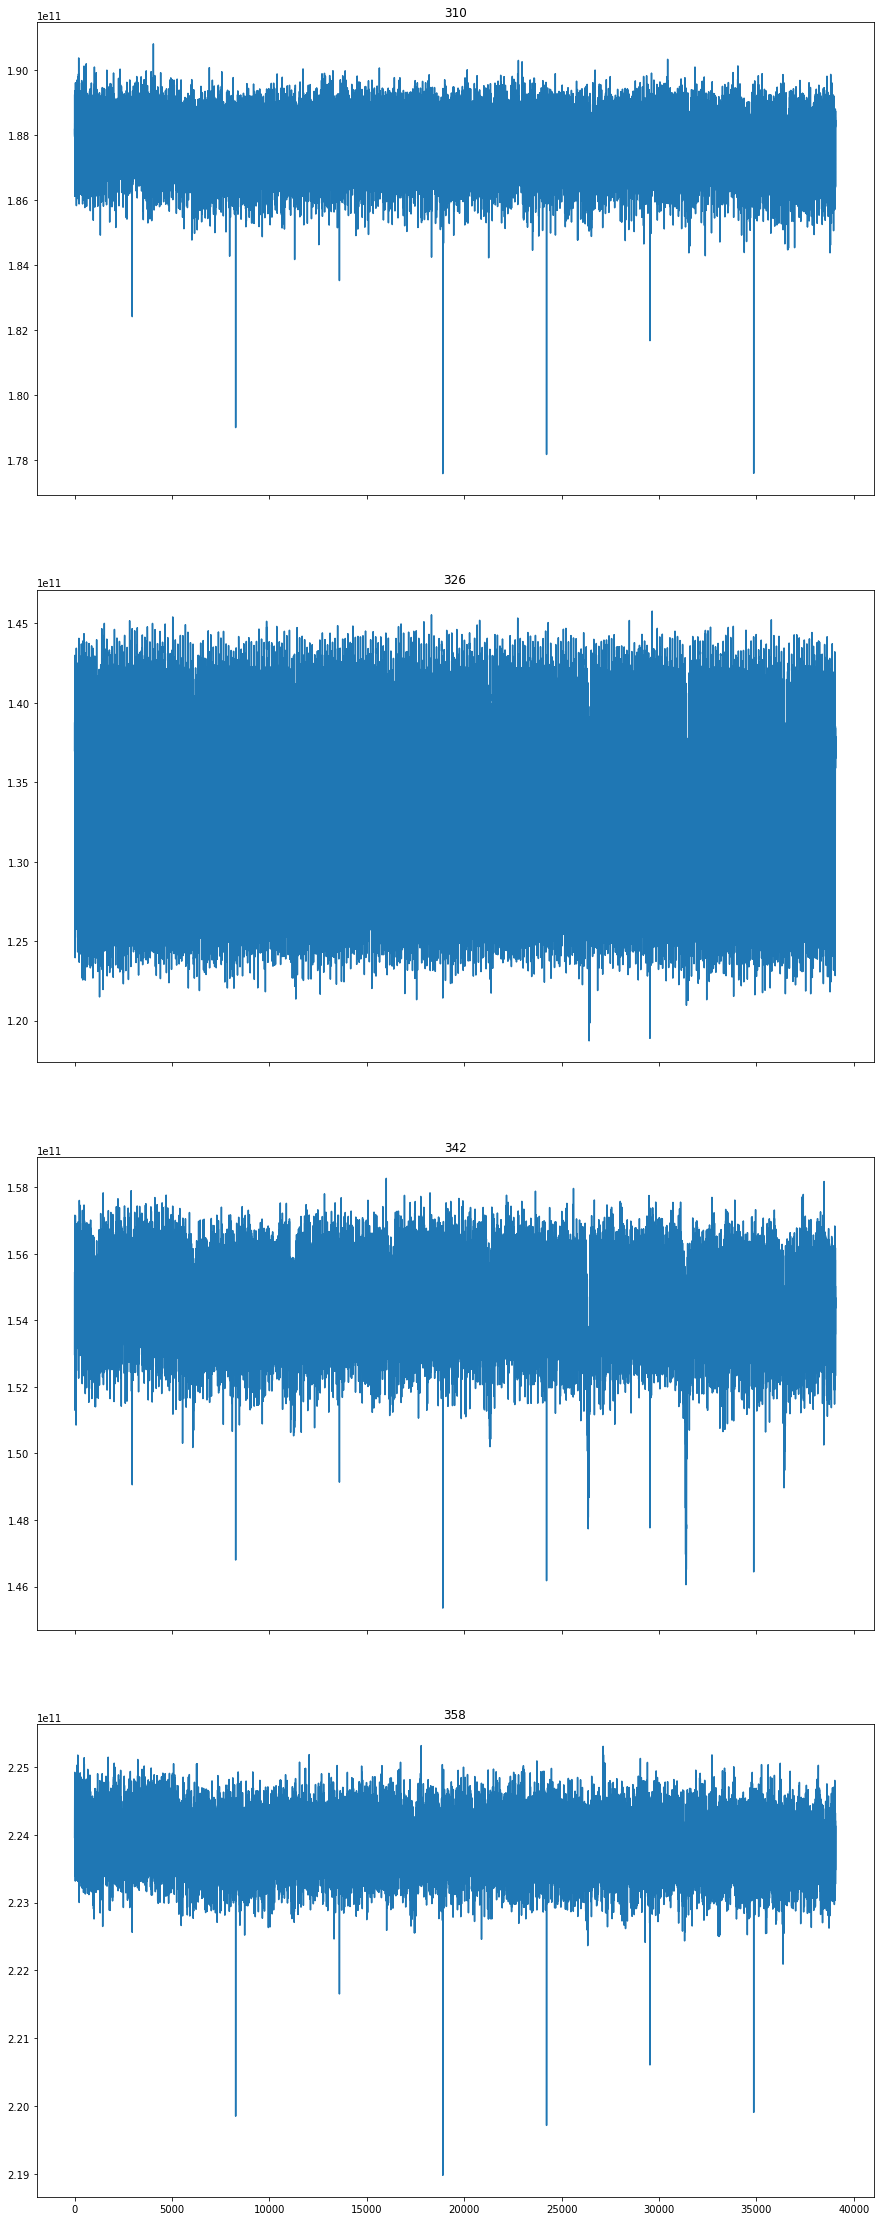

In [15]:
fig, axis = plt.subplots(4, 1, sharex=True, figsize=(15,40))

axis[0].plot(time310)
axis[0].set_title('310')
axis[1].plot(time326)
axis[1].set_title('326')
axis[2].plot(time342)
axis[2].set_title('342')
axis[3].plot(time358)
axis[3].set_title('358')

In [16]:
bandpass310swapped = np.copy(bandpass310)
bandpass310swapped[512:] = np.copy(bandpass310[0:511])
bandpass310swapped[0:511] = bandpass310[512:]
bandpass326swapped = np.copy(bandpass326)
bandpass326swapped[512:] = np.copy(bandpass326[0:511])
bandpass326swapped[0:511] = bandpass326[512:]
bandpass342swapped = np.copy(bandpass342)
bandpass342swapped[512:] = np.copy(bandpass342[0:511])
bandpass342swapped[0:511] = bandpass342[512:]
bandpass358swapped = np.copy(bandpass358)
bandpass358swapped[512:] = np.copy(bandpass358[0:511])
bandpass358swapped[0:511] = bandpass358[512:]
fullbandswapped = np.concatenate((bandpass310swapped, bandpass326swapped, bandpass342swapped, bandpass358swapped))
fullbandswapped.shape

ValueError: could not broadcast input array from shape (511) into shape (512)

In [ ]:
fig = plt.figure(figsize=(15,10))

ax =fig.gca()

ax.plot(fullbandswapped)
#ax.plot(fullbandpass, 'r')
ax.set_yscale('log')

In [ ]:
diff310326 = bandpass310swapped[1022] - bandpass326swapped[0]
diff326342 = bandpass326swapped[1022] - bandpass342swapped[0]
diff342358 = bandpass342swapped[1022] - bandpass358swapped[0]

norm310 = np.copy(bandpass310swapped)
norm326 = np.copy(bandpass326swapped) + diff310326
norm342 = np.copy(bandpass342swapped) + diff326342 + diff310326
norm358 = np.copy(bandpass358swapped) + diff342358 + diff326342 + diff310326

fullnorm = np.concatenate((norm310, norm326, norm342, norm358))
fullnorm.shape

In [ ]:
fig = plt.figure(figsize=(15,10))

ax =fig.gca()

ax.plot(fullnorm)
ax.set_yscale('log')
ax.set_title('Swapped halves')

In [ ]:
tryarray = np.arange(8)
tryarray[0:2] = 0
print(tryarray)
np.flip(tryarray, axis=0)

<h1>Swapped bands</h1>

In [ ]:
bandpass310 = np.sum(data310[0:, :], axis=1)
bandpass326 = np.sum(data326[0:, :], axis=1)
bandpass342 = np.sum(data342[0:, :], axis=1)
bandpass358 = np.sum(data358[0:, :], axis=1)

In [ ]:
bandpass310swapped = np.ones((1024))
bandpass310swapped[0:512] = bandpass310[512:]
bandpass310swapped[512:] = bandpass310[0:512]
bandpass310swapped[512] = (bandpass310swapped[510] + bandpass310swapped[511] + bandpass310swapped[513] + bandpass310swapped[514]) / 4.0

bandpass326swapped = np.ones((1024))
bandpass326swapped[0:512] = bandpass326[512:]
bandpass326swapped[512:] = bandpass326[0:512]
bandpass326swapped[512] = (bandpass326swapped[510] + bandpass326swapped[511] + bandpass326swapped[513] + bandpass326swapped[514]) / 4.0


bandpass342swapped = np.ones((1024))
bandpass342swapped[0:512] = bandpass342[512:]
bandpass342swapped[512:] = bandpass342[0:512]
bandpass342swapped[512] = (bandpass342swapped[510] + bandpass342swapped[511] + bandpass342swapped[513] + bandpass342swapped[514]) / 4.0


bandpass358swapped = np.ones((1024))
bandpass358swapped[0:512] = bandpass358[512:]
bandpass358swapped[512:] = bandpass358[0:512]
bandpass358swapped[512] = (bandpass358swapped[510] + bandpass358swapped[511] + bandpass358swapped[513] + bandpass358swapped[514]) / 4.0


In [ ]:
fig, axis = plt.subplots(4, 1, sharex=True, figsize=(15,40))

axis[0].plot(bandpass310swapped)
axis[0].set_title('Swapped 310')
axis[0].set_yscale('log')
axis[1].plot(bandpass326swapped)
axis[1].set_title('Swapped 326')
axis[1].set_yscale('log')
axis[2].plot(bandpass342swapped)
axis[2].set_title('Swapped 342')
axis[2].set_yscale('log')
axis[3].plot(bandpass358swapped)
axis[3].set_title('Swapped 358')
axis[3].set_yscale('log')

In [ ]:
fullbandswapped = np.concatenate((bandpass310swapped, bandpass326swapped, bandpass342swapped, bandpass358swapped))

In [ ]:
fig = plt.figure(figsize=(15,10))

ax = fig.gca()

ax.plot(fullbandswapped)
ax.set_yscale('log')

In [ ]:
from statsmodels import robust

In [ ]:
bandpass310median = np.median(bandpass310swapped)
bandpass310std = np.std(bandpass310swapped)
bandpass310mad = robust.mad(bandpass310swapped)

print(bandpass310std)
print(bandpass310mad)

#limit310 = bandpass310median + 5.0 * bandpass310std
limit310 = bandpass310median + 5.0 * bandpass310mad

bandpass310swappedclipped = np.copy(bandpass310swapped)
bandpass310swappedclipped[bandpass310swappedclipped > limit310] = limit310

bandpass326median = np.median(bandpass326swapped)
bandpass326std = np.std(bandpass326swapped)
bandpass326mad = robust.mad(bandpass326swapped)

print(bandpass326std)
print(bandpass326mad)

#limit326 = bandpass326median + 5.0 * bandpass326std
limit326 = bandpass326median + 5.0 * bandpass326mad

bandpass326swappedclipped = np.copy(bandpass326swapped)
bandpass326swappedclipped[bandpass326swappedclipped > limit326] = limit326

bandpass342median = np.median(bandpass342swapped)
bandpass342std = np.std(bandpass342swapped)
bandpass342mad = robust.mad(bandpass342swapped)

print(bandpass342std)
print(bandpass342mad)

#limit342 = bandpass342median + 5.0 * bandpass342std
limit342 = bandpass342median + 5.0 * bandpass342mad

bandpass342swappedclipped = np.copy(bandpass342swapped)
bandpass342swappedclipped[bandpass342swappedclipped > limit342] = limit342

bandpass358median = np.median(bandpass358swapped)
bandpass358std = np.std(bandpass358swapped)
bandpass358mad = robust.mad(bandpass358swapped)

print(bandpass358std)
print(bandpass358mad)

#limit358 = bandpass358median + 5.0 * bandpass358std
limit358 = bandpass358median + 5.0 * bandpass358mad

bandpass358swappedclipped = np.copy(bandpass358swapped)
bandpass358swappedclipped[bandpass358swappedclipped > limit358] = limit358

In [ ]:
fig, axis = plt.subplots(4, 1, sharex=True, figsize=(15,40))

axis[0].plot(bandpass310swappedclipped)
axis[0].set_title('Swapped 310 clipped')
axis[0].set_yscale('log')
axis[1].plot(bandpass326swappedclipped)
axis[1].set_title('Swapped 326 clipped')
axis[1].set_yscale('log')
axis[2].plot(bandpass342swappedclipped)
axis[2].set_title('Swapped 342 clipped')
axis[2].set_yscale('log')
axis[3].plot(bandpass358swappedclipped)
axis[3].set_title('Swapped 358 clipped')
axis[3].set_yscale('log')

In [ ]:
fullbandswappedclipped = np.concatenate((bandpass310swappedclipped, bandpass326swappedclipped, bandpass342swappedclipped, bandpass358swappedclipped))

In [ ]:
fig = plt.figure(figsize=(15,10))

ax = fig.gca()

ax.plot(fullbandswappedclipped, 'b', linewidth=2.0)
ax.plot(fullbandswapped, 'r--', linewidth=0.5)
ax.set_yscale('log')

In [ ]:
fig = plt.figure(figsize=(15,10))

ax = fig.gca()

ax.plot(bandpass310swappedclipped, 'b', linewidth=2.0)
ax.plot(bandpass310swapped, 'r--', linewidth=0.5)
ax.set_yscale('log')

In [ ]:
conv310tmp = np.convolve(bandpass310swapped, np.ones(32), 'valid') / 32
print(conv310tmp.shape)
conv310 = np.ones((1024))
conv310[16:1009] = conv310tmp
conv310[0:16] = conv310[16]
conv310[1009:] = conv310[1008]

In [ ]:
fig = plt.figure(figsize=(15,10))

ax = fig.gca()

ax.plot(conv310, 'b', linewidth=2.0)
ax.plot(bandpass310swapped, 'r--', linewidth=0.5)
ax.set_yscale('log')

In [ ]:
norm310 = bandpass310swapped - conv310

In [ ]:
fig = plt.figure(figsize=(15,10))

ax = fig.gca()

ax.plot(norm310)
#ax.set_yscale('log')

<h1>GPU bandpass</h1>

In [17]:
gpuband310 = np.loadtxt("310/bandpass.dat")
gpuband310[0] = gpuband310[1]
bandpass310[0] = bandpass310[1]
gpuband310diff = np.zeros((1022))
gpuband310diff = (gpuband310[2:] - gpuband310[:1022]) / 2

In [18]:
from statsmodels import robust

In [19]:
gpuband310diffmedian = np.median(gpuband310diff)
gpuband310diffmad = robust.mad(gpuband310diff)

madthresholdlow = 5.0
madthresholdhigh = 10.0

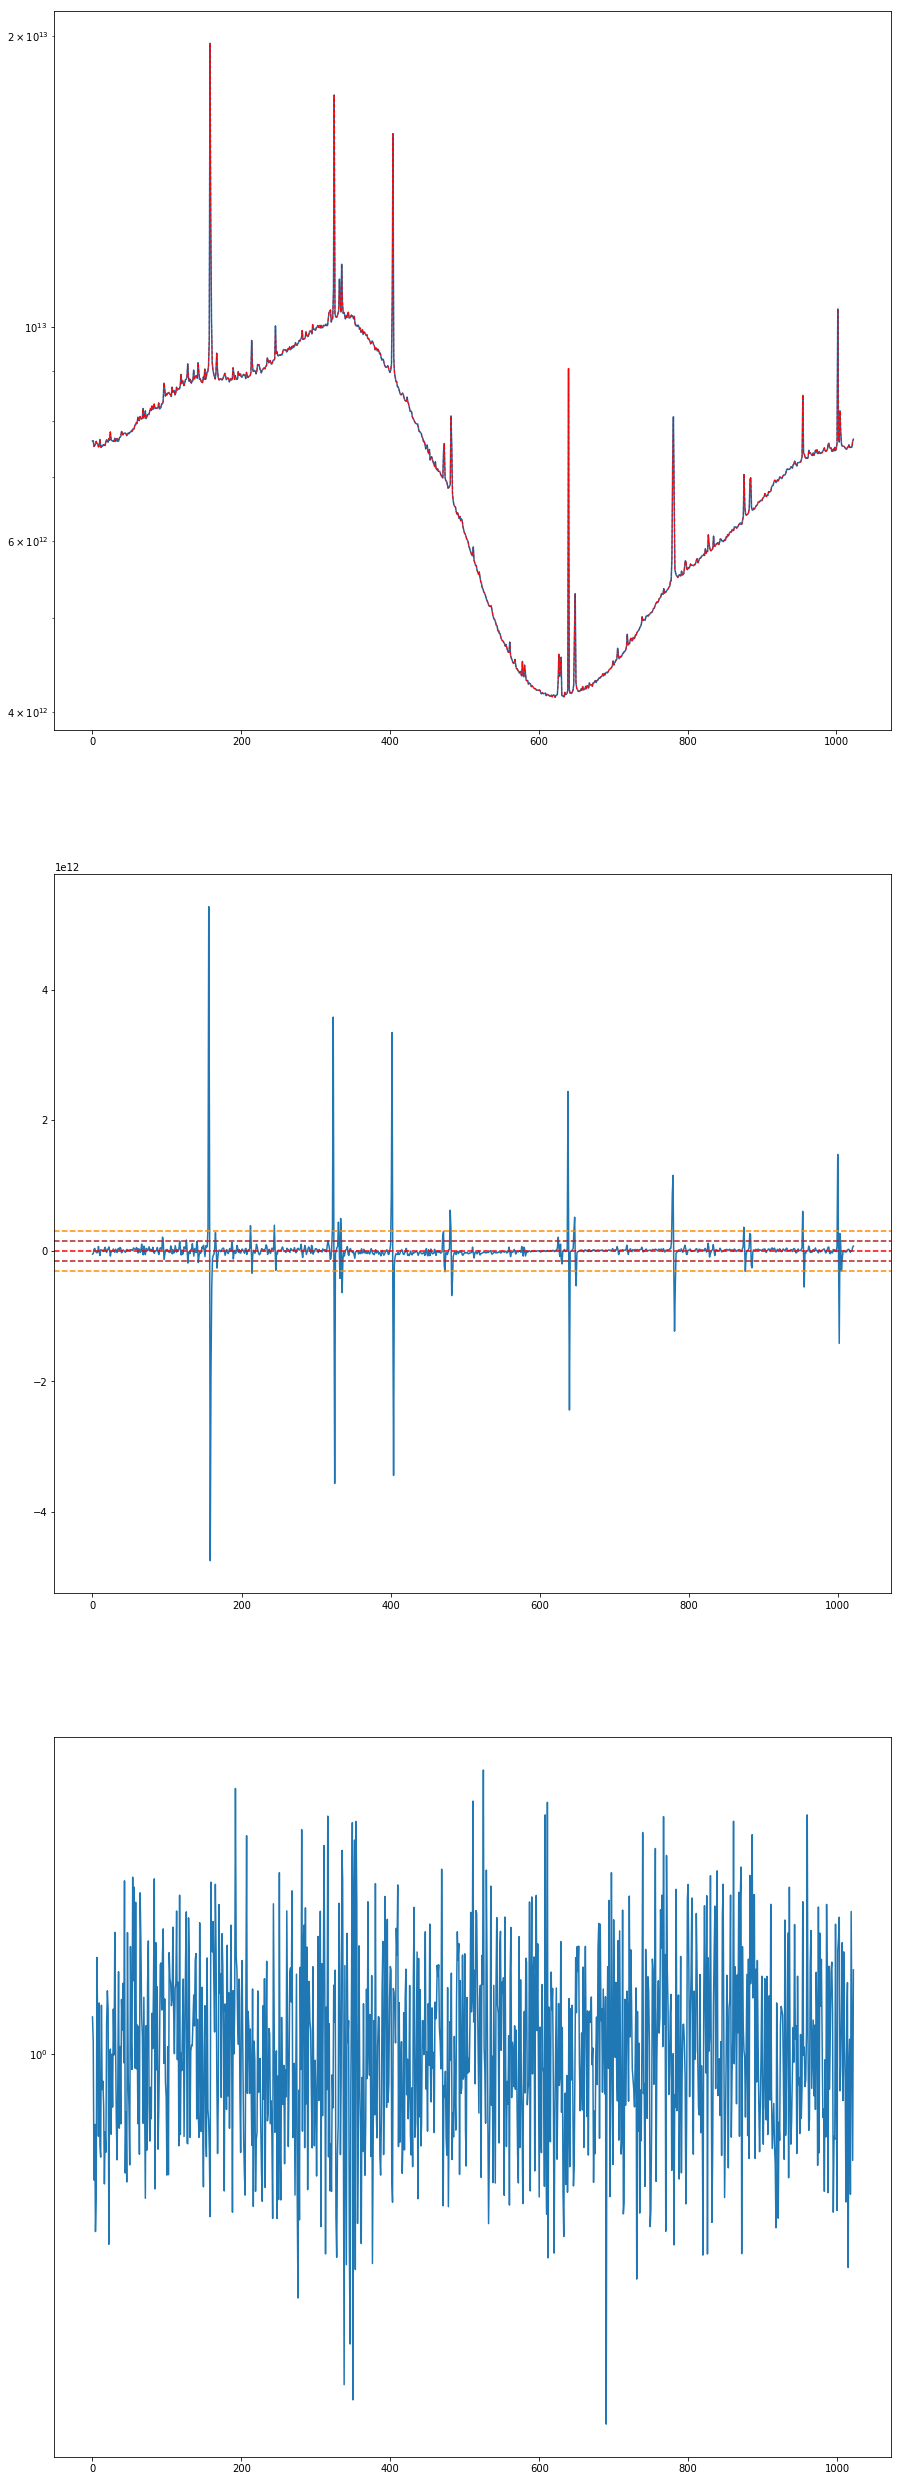

In [20]:
fig, axis = plt.subplots(3, 1, figsize=(15,45))


axis[0].plot(gpuband310[:])
axis[0].plot(bandpass310[:], 'r', linestyle='--', linewidth=1.0)
axis[0].set_yscale('log')

axis[1].plot(gpuband310diff)
axis[1].axhline(gpuband310diffmedian, color='r', linestyle='--')
axis[1].axhline(gpuband310diffmedian + madthresholdlow * gpuband310diffmad, color='firebrick', linestyle='--')
axis[1].axhline(gpuband310diffmedian - madthresholdlow * gpuband310diffmad, color='firebrick', linestyle='--')
axis[1].axhline(gpuband310diffmedian + madthresholdhigh * gpuband310diffmad, color='darkorange', linestyle='--')
axis[1].axhline(gpuband310diffmedian - madthresholdhigh * gpuband310diffmad, color='darkorange', linestyle='--')


axis[2].plot(gpuband310[1:] / bandpass310[1:])
axis[2].set_yscale('log')

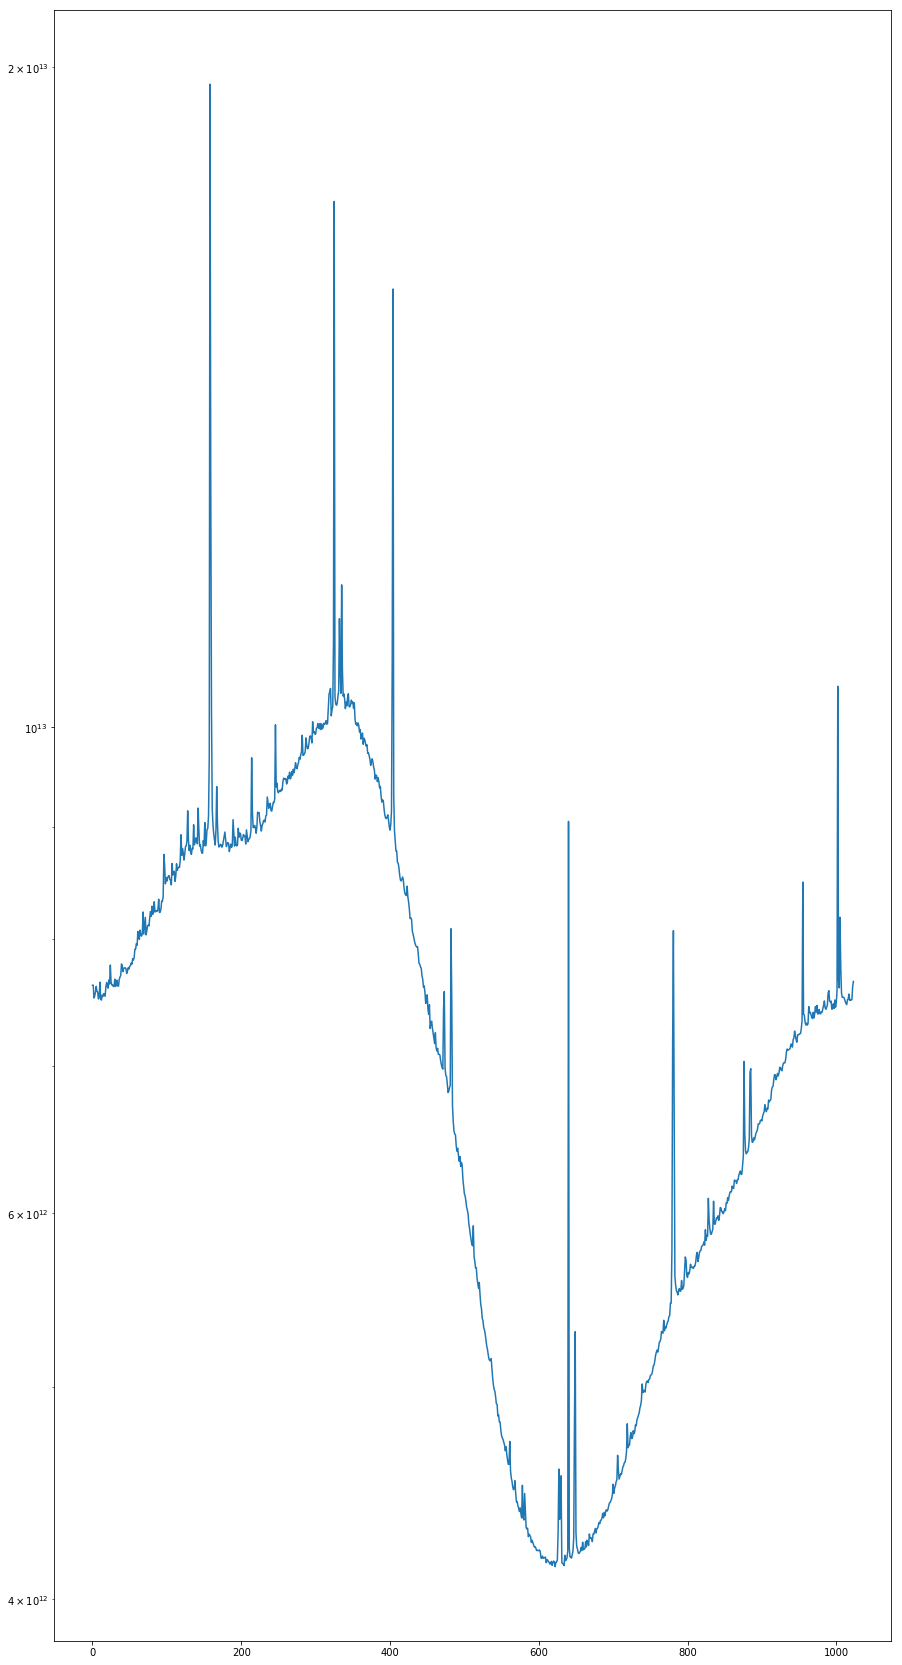

In [21]:
fig, axis = plt.subplots(1, 1, figsize=(15,30))


axis.plot(gpuband310[:])
#axis.plot(bandpass310[:], 'r', linestyle='--', linewidth=1.0)
axis.set_yscale('log')

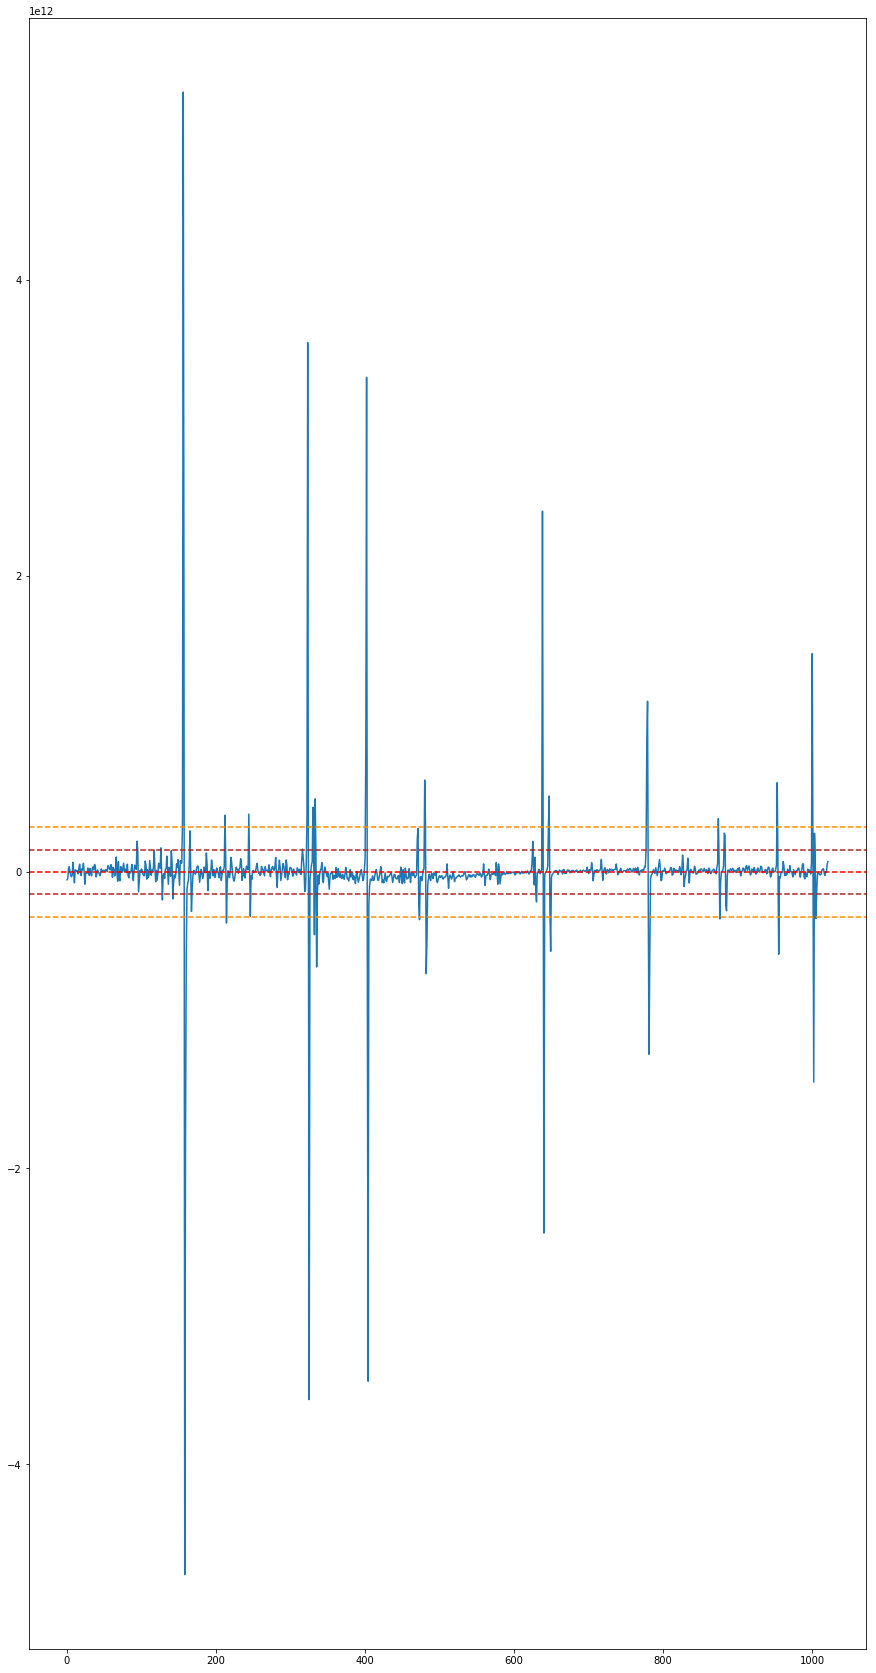

In [22]:
fig, axis = plt.subplots(1, 1, figsize=(15,30))

axis.plot(gpuband310diff)
axis.axhline(gpuband310diffmedian, color='r', linestyle='--')
axis.axhline(gpuband310diffmedian + madthresholdlow * gpuband310diffmad, color='firebrick', linestyle='--')
axis.axhline(gpuband310diffmedian - madthresholdlow * gpuband310diffmad, color='firebrick', linestyle='--')
axis.axhline(gpuband310diffmedian + madthresholdhigh * gpuband310diffmad, color='darkorange', linestyle='--')
axis.axhline(gpuband310diffmedian - madthresholdhigh * gpuband310diffmad, color='darkorange', linestyle='--')


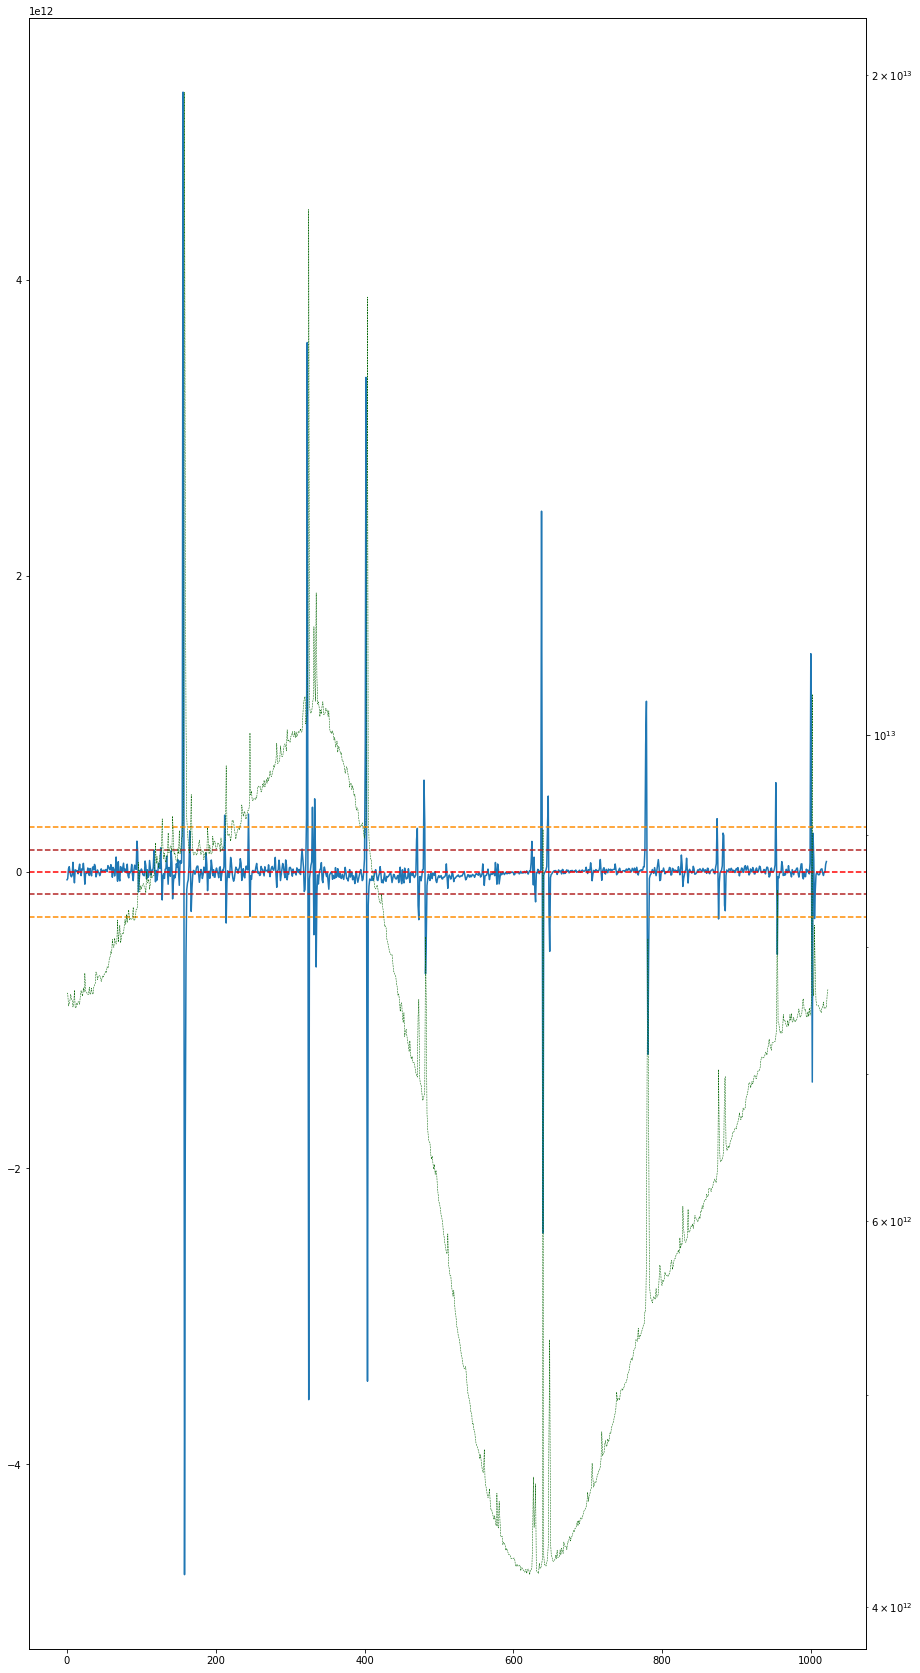

In [23]:
fig, axis = plt.subplots(1, 1, figsize=(15,30))

axis2 = axis.twinx()

axis.plot(gpuband310diff, label='Derivative', linewidth=1.5)
axis.axhline(gpuband310diffmedian, color='r', linestyle='--')
axis.axhline(gpuband310diffmedian + madthresholdlow * gpuband310diffmad, color='firebrick', linestyle='--')
axis.axhline(gpuband310diffmedian - madthresholdlow * gpuband310diffmad, color='firebrick', linestyle='--')
axis.axhline(gpuband310diffmedian + madthresholdhigh * gpuband310diffmad, color='darkorange', linestyle='--')
axis.axhline(gpuband310diffmedian - madthresholdhigh * gpuband310diffmad, color='darkorange', linestyle='--')


axis2.plot(gpuband310[:], color='darkgreen', linestyle='--', linewidth=0.5)
axis2.set_yscale('log')

In [24]:
crosslow = np.where(np.absolute(gpuband310diff) > madthresholdlow * gpuband310diffmad)
crosshigh = np.where(np.absolute(gpuband310diff) > madthresholdhigh * gpuband310diffmad)

print(crosslow[0])

[  94  126  128  142  155  156  157  158  159  160  165  167  212  214
  244  246  316  322  323  324  325  330  332  333  335  401  402  403
  404  405  470  471  472  473  480  481  482  483  625  630  638  640
  646  647  648  649  777  778  779  780  781  782  874  876  882  883
  884  885  953  955 1000 1002 1003 1005]


(128, 200)

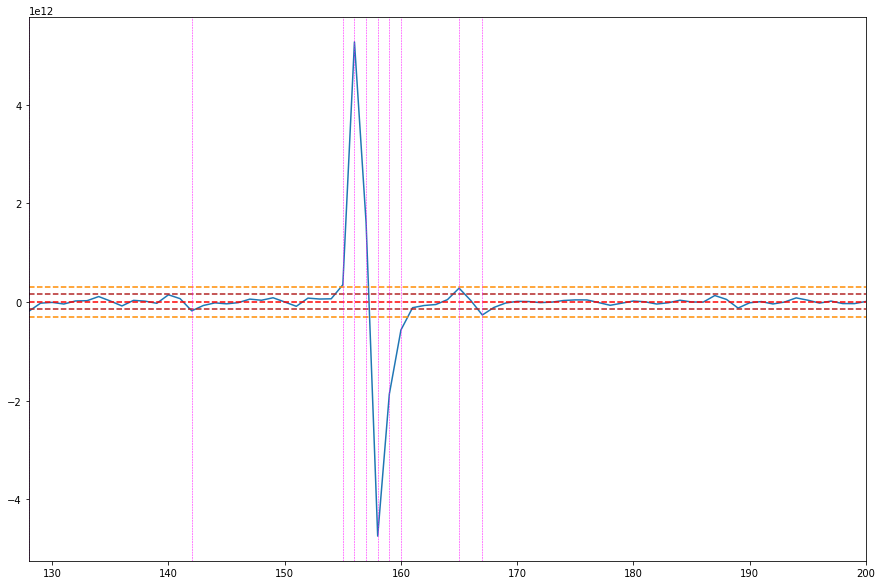

In [25]:
fig, axis = plt.subplots(1, 1, figsize=(15,10))

axis.plot(gpuband310diff)
axis.axhline(gpuband310diffmedian, color='r', linestyle='--')
axis.axhline(gpuband310diffmedian + madthresholdlow * gpuband310diffmad, color='firebrick', linestyle='--')
axis.axhline(gpuband310diffmedian - madthresholdlow * gpuband310diffmad, color='firebrick', linestyle='--')
axis.axhline(gpuband310diffmedian + madthresholdhigh * gpuband310diffmad, color='darkorange', linestyle='--')
axis.axhline(gpuband310diffmedian - madthresholdhigh * gpuband310diffmad, color='darkorange', linestyle='--')

_ = [axis.axvline(cross, color='magenta', linestyle='--', linewidth=0.5) for cross in crosslow[0]]

axis.set_xlim(128, 200)

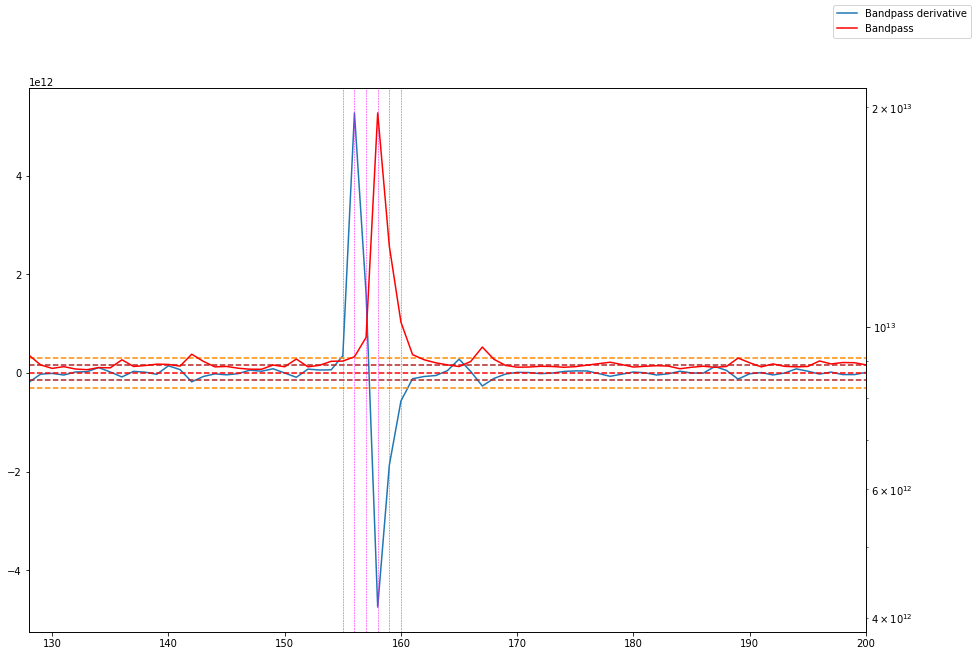

In [26]:
fig, axis = plt.subplots(1, 1, figsize=(15,10))

axis2 = axis.twinx()

axis.plot(gpuband310diff, label='Bandpass derivative')
axis.axhline(gpuband310diffmedian, color='r', linestyle='--')
axis.axhline(gpuband310diffmedian + madthresholdlow * gpuband310diffmad, color='firebrick', linestyle='--')
axis.axhline(gpuband310diffmedian - madthresholdlow * gpuband310diffmad, color='firebrick', linestyle='--')
axis.axhline(gpuband310diffmedian + madthresholdhigh * gpuband310diffmad, color='darkorange', linestyle='--')
axis.axhline(gpuband310diffmedian - madthresholdhigh * gpuband310diffmad, color='darkorange', linestyle='--')

_ = [axis.axvline(cross, color='magenta', linestyle='--', linewidth=0.5) for cross in crosshigh[0]]

axis.set_xlim(128, 200)

axis2.plot(gpuband310, 'r', label='Bandpass')
axis2.set_yscale('log')

fig.legend()

<h3>Quick method that will work for single-channel RFI</h3>
Could even go other way to detect point of negative derivative, just to cover outselves

In [27]:
gpu310aboveindices = np.zeros(1024)
gpuband310filtered = np.copy(gpuband310)

for ichan in np.arange(1022):
    if gpuband310diff[ichan] > gpuband310diffmedian + madthresholdhigh * gpuband310diffmad:
        gpu310aboveindices[ichan + 2] = 1
        
for ichan in np.arange(1024):
    if gpu310aboveindices[ichan] == 1:
        gpuband310filtered[ichan] = gpuband310filtered[ichan - 1]

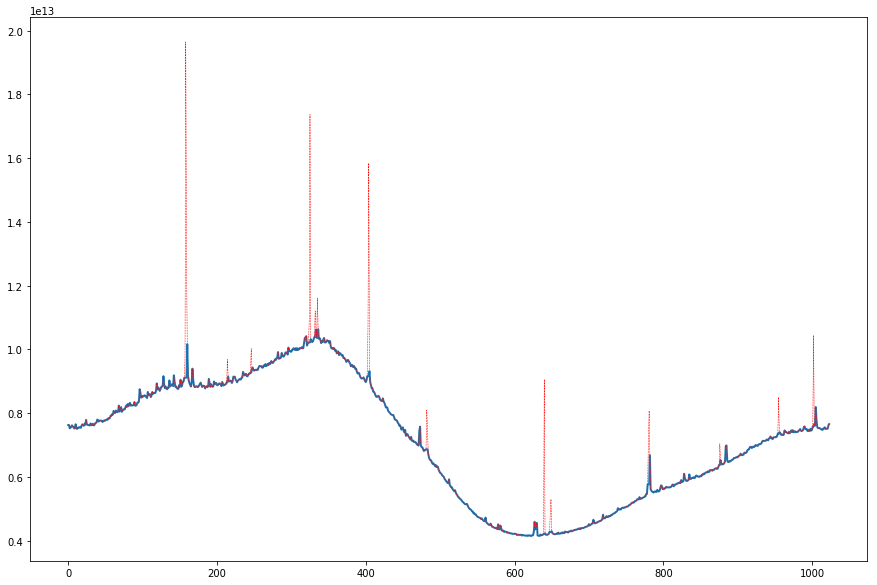

In [28]:
fig, axis = plt.subplots(1, 1, figsize=(15,10))


axis.plot(gpuband310filtered, linewidth=2.0)
axis.plot(gpuband310, 'r', linestyle='--', linewidth=0.5)

<h1>Slightly more sophisticated band estimation</h1>
Divide into 512 channel chunks (positve and negative parts of 1024-channel FFT - seems like quite a natural chunk) and try fitting a function to it. As we are dealing with fairly short intervals, use a relatively simple function: f(x) = a0 + a1 * x + a2 * x^2 + a3 * x^3

In [29]:
# This is where swapping happens
gpuband310p1 = gpuband310[512:]
gpuband310p2 = gpuband310[0:512]

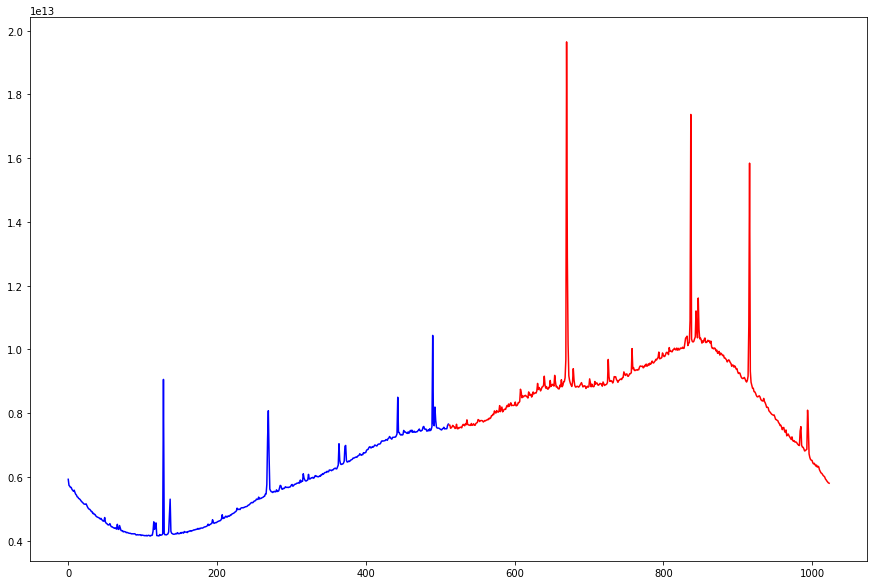

In [30]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()

ax.plot(gpuband310p1, 'b')
ax.plot(np.arange(512) + 512, gpuband310p2, 'r')

In [31]:
from scipy.optimize import curve_fit
def func(x, a, b, c, d):
    return a + b * x + c * x**2 + d * x**3

In [32]:
# That does f-all - need to really know the position of RFI before we fit the curve so that we can weight the RFI points accordingly
popt, pcov = curve_fit(func, np.arange(512), gpuband310p1)

/home/mateusz/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


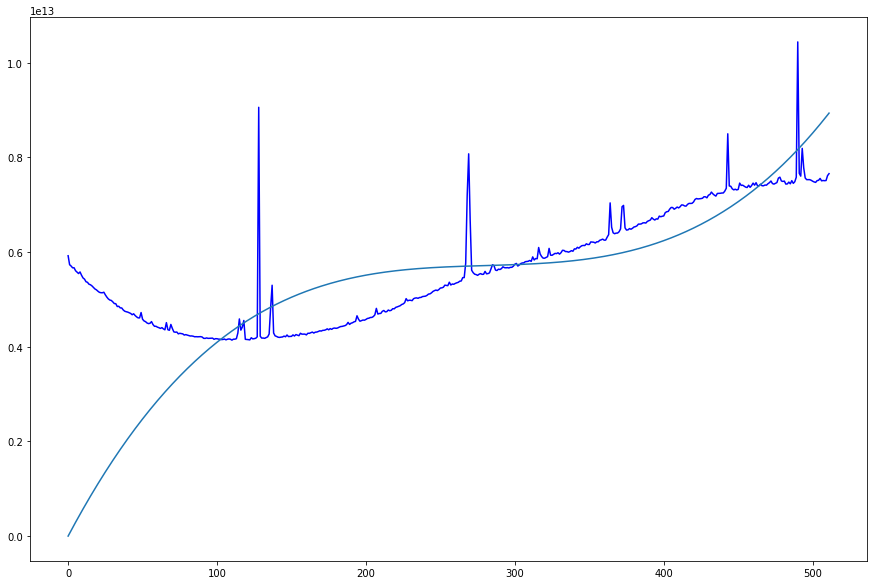

In [33]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()

ax.plot(gpuband310p1, 'b')
ax.plot(func(np.arange(512), *popt))

<h3>Just a very wild idea with interpolation</h3>
This seems like and overkil - why not just run median across the whole band?

In [34]:
nmedians = int(512/32)
gpuband310p1medians = np.zeros((nmedians))

for median in np.arange(nmedians):
    
    start = median * 32
    end = (median + 1) * 32
    
    gpuband310p1medians[median] = np.median(gpuband310p1[start:end])
    
xmedians = np.arange(nmedians) * 32 + 16

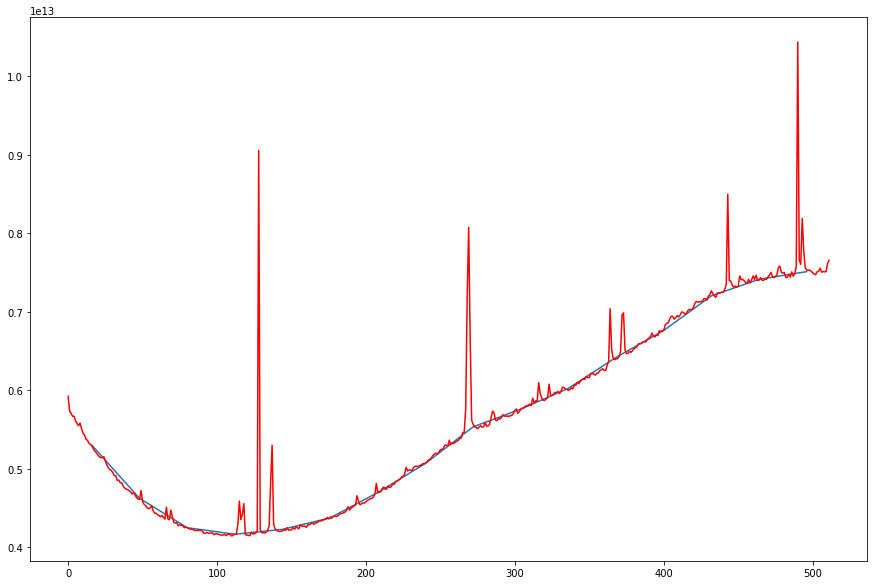

In [35]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()

ax.plot(xmedians, gpuband310p1medians)
ax.plot(np.arange(512), gpuband310p1, 'r')

In [36]:
from scipy.interpolate import interp1d

In [37]:
gpuband310p1inter = interp1d(xmedians, gpuband310p1medians, kind='cubic', fill_value="extrapolate")

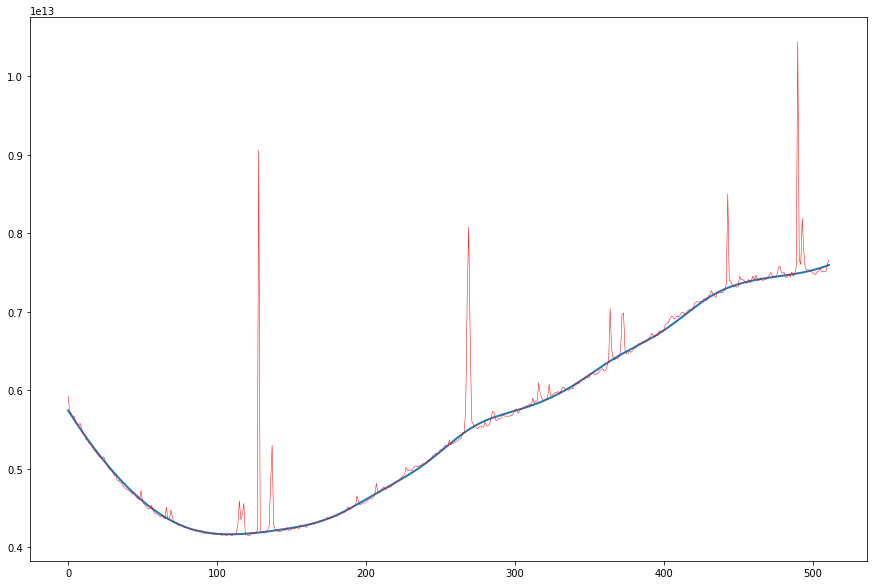

In [38]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()

plt.plot(np.arange(512), gpuband310p1inter(np.arange(512)), linewidth=2.0)
ax.plot(np.arange(512), gpuband310p1, 'r', linewidth=0.5)

In [39]:
gpuband310p1fullmedians = np.zeros((512))

for median in np.arange(512 - 32):
    
    start = median
    end = median + 32
    save = start + 16
    
    gpuband310p1fullmedians[save] = np.median(gpuband310p1[start:end])

# That's just a shitty linear interpolation
    
for median in np.arange(16):
    
    save = 16 - median - 1
     
    gpuband310p1fullmedians[save] = gpuband310p1fullmedians[save + 1] + (gpuband310p1fullmedians[save + 1] - gpuband310p1fullmedians[save + 2])

for median in np.arange(16):
    
    save = 512 - 16 + median
     
    gpuband310p1fullmedians[save] = gpuband310p1fullmedians[save - 1] + (gpuband310p1fullmedians[save - 1] - gpuband310p1fullmedians[save - 2])

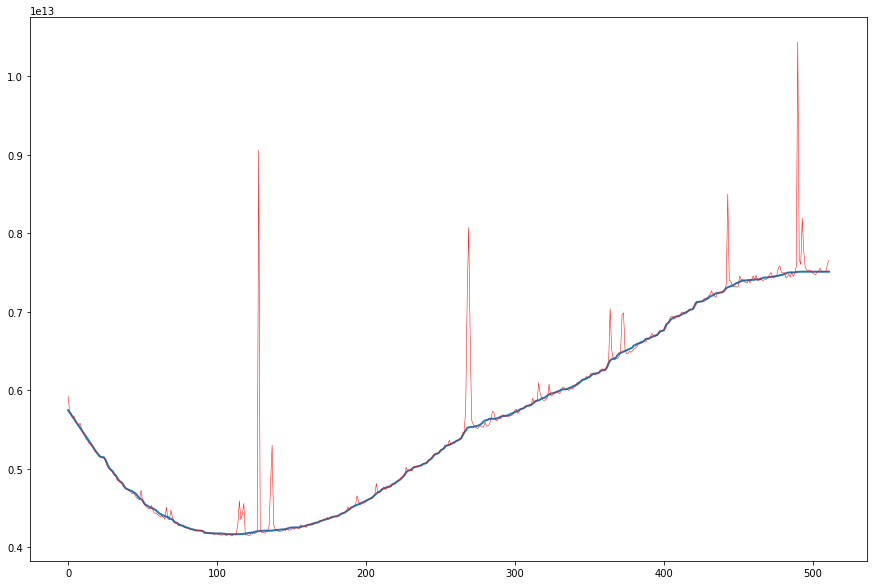

In [40]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()

plt.plot(np.arange(512), gpuband310p1fullmedians, linewidth=2.0)
ax.plot(np.arange(512), gpuband310p1, 'r', linewidth=0.5)

<h3>Using whole band</h3>

In [42]:
data310 = np.reshape(np.fromfile('310/2019-01-30-10:09:17_0000000000000000.000000.dat', dtype=np.float32), (-1, 1024)).T
data326 = np.reshape(np.fromfile('326/2019-01-30-10:09:17_0000000000000000.000000.dat', dtype=np.float32), (-1, 1024)).T
data342 = np.reshape(np.fromfile('342/2019-01-30-10:09:17_0000000000000000.000000.dat', dtype=np.float32), (-1, 1024)).T
data358 = np.reshape(np.fromfile('358/2019-01-30-10:09:17_0000000000000000.000000.dat', dtype=np.float32), (-1, 1024)).T

In [43]:
bandpass310 = np.sum(data310[0:, :], axis=1)
bandpass326 = np.sum(data326[0:, :], axis=1)
bandpass342 = np.sum(data342[0:, :], axis=1)
bandpass358 = np.sum(data358[0:, :], axis=1)

In [44]:
bandpass310swapped = np.zeros((1024))
bandpass326swapped = np.zeros((1024))
bandpass342swapped = np.zeros((1024))
bandpass358swapped = np.zeros((1024))

In [56]:
bandpass310swapped[0:512] = bandpass310[512:]
bandpass310swapped[512:] = bandpass310[:512]
bandpass310swapped[512] = bandpass310swapped[513]
bandpass326swapped[0:512] = bandpass326[512:]
bandpass326swapped[512:] = bandpass326[:512]
bandpass326swapped[512] = bandpass326swapped[513]
bandpass342swapped[0:512] = bandpass342[512:]
bandpass342swapped[512:] = bandpass342[:512]
bandpass342swapped[512] = bandpass342swapped[513]
bandpass358swapped[0:512] = bandpass358[512:]
bandpass358swapped[512:] = bandpass358[:512]
bandpass358swapped[512] = bandpass358swapped[513]

In [57]:
bandpassfull = np.concatenate((bandpass310swapped, bandpass326swapped, bandpass342swapped, bandpass358swapped))

In [58]:
bandpassfullmedians = np.zeros(4096)

for median in np.arange(4096 - 32):
    save = median + 16
    start = median
    end = median + 32
    
    bandpassfullmedians[save] = np.median(bandpassfull[start:end])
    
for median in np.arange(16):
    
    save = 16 - median - 1
    
    bandpassfullmedians[save] = bandpassfullmedians[save + 1] + (bandpassfullmedians[save + 1] - bandpassfullmedians[save + 2])
    
for median in np.arange(16):
    
    save = 4096 - 16 + median
    
    bandpassfullmedians[save] = bandpassfullmedians[save - 1] + (bandpassfullmedians[save - 1] - bandpassfullmedians[save - 2])

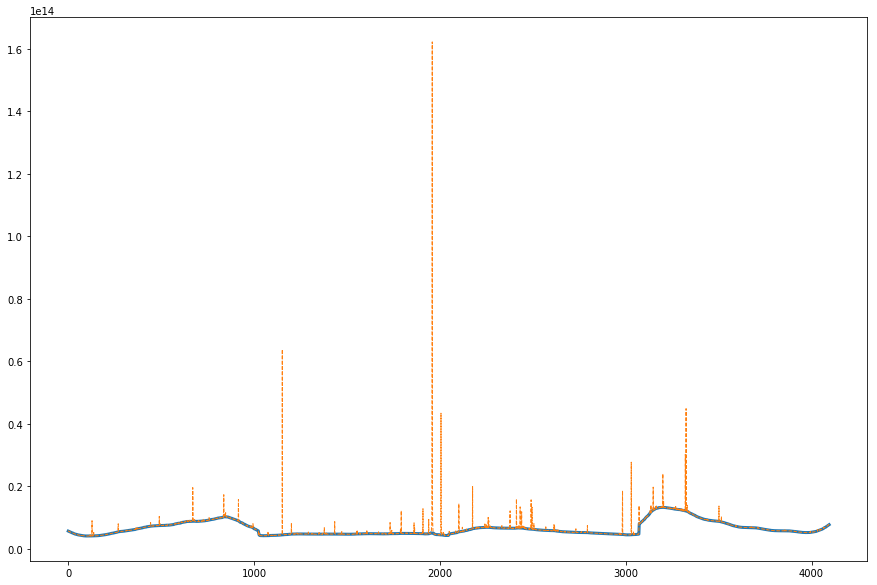

In [63]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()

ax.plot(bandpassfullmedians, linewidth=3.0)
ax.plot(bandpassfull, linestyle='--', linewidth=1.0)

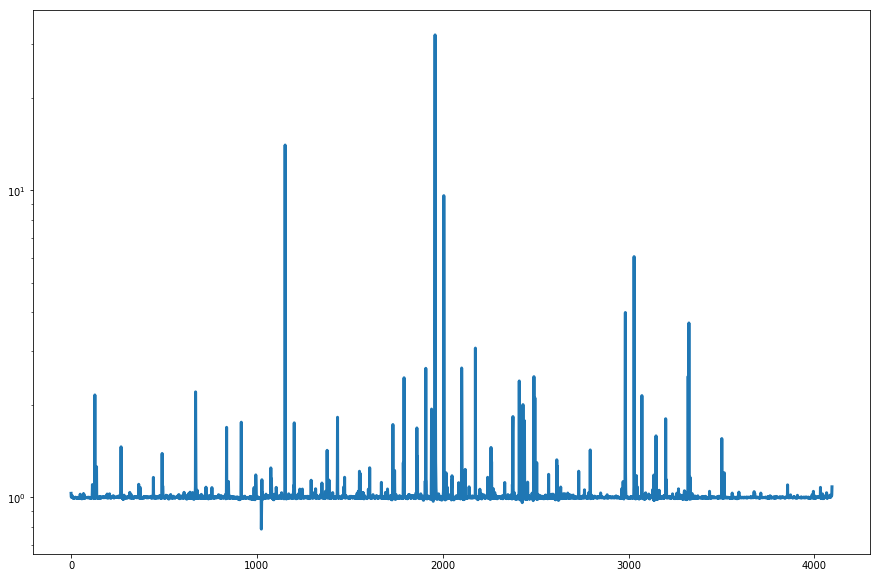

In [65]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()

ax.plot(bandpassfull / bandpassfullmedians, linewidth=2.0)
ax.set_yscale('log')

<h1>'Original' filterbank files</h1>

In [ ]:
orig310 = np.reshape(np.loadtxt('310/2019-01-30-10:09:17.dat'), (-1, 1024)).T
orig326 = np.reshape(np.loadtxt('326/2019-01-30-10:09:17.dat'), (-1, 1024)).T
orig342 = np.reshape(np.loadtxt('342/2019-01-30-10:09:17.dat'), (-1, 1024)).T
orig358 = np.reshape(np.loadtxt('358/2019-01-30-10:09:17.dat'), (-1, 1024)).T

In [ ]:
fig = plt.figure(figsize=(15,10))

plt.imshow(orig310, aspect='auto')

In [ ]:
origband310 = np.sum(orig310, axis=1) / orig310.shape[1]
origband326 = np.sum(orig326, axis=1) / orig326.shape[1]
origband342 = np.sum(orig342, axis=1) / orig342.shape[1]
origband358 = np.sum(orig358, axis=1) / orig358.shape[1]

print(orig310.shape[1])

origbandfull = np.concatenate((origband310, origband326, origband342, origband358))

In [ ]:
fig = plt.figure(figsize=(15,10))

ax =fig.gca()

ax.plot(origbandfull)

In [ ]:
for x in np.arange(16):
    print(orig310[x])